This project aimed to investigate factors affecting life expectancy and develop a regression model using mixed effects and multiple linear regression.This project utilized various regression models including Linear Regression, Lasso, Elastic Net, Ridge Regression, Random Forest and Decision Tree Regression. The models were evaluated based on their R-squared scores because it is a comprehensive metric that assesses the overall fit of the regression model.

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
working_directory = r"C:\Users\Administrator\Desktop\PYTHON\Projects\Life Expectancy Data"
os.chdir(working_directory)

In [3]:
data = pd.read_csv("Life Expectancy Data.csv")
data.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
data.shape

(2938, 22)

In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Data Cleaning

In [7]:
#checking for missing values
missing_values = data.isnull().sum()
missing_values

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
data.keys()

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select columns with missing values
columns_with_missing = ['Life expectancy ', 'Adult Mortality',
'Alcohol', 'Hepatitis B','Measles ', ' BMI ', 'Polio', 'Total expenditure','Diphtheria ', 'GDP', 'Population',
' thinness  1-19 years', ' thinness 5-9 years',
'Income composition of resources', 'Schooling']

data_with_missing = data[columns_with_missing]

imputer = IterativeImputer()
imputed_data = imputer.fit_transform(data_with_missing)
df = pd.DataFrame(imputed_data, columns=columns_with_missing)

data.update(df)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

The data now has no missing values

handling strings 

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Country'] = label_encoder.fit_transform(data['Country'])
data['Status'] = label_encoder.fit_transform(data['Status'])

In [12]:
data['Year'].value_counts()

Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64

In [13]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data Visualization

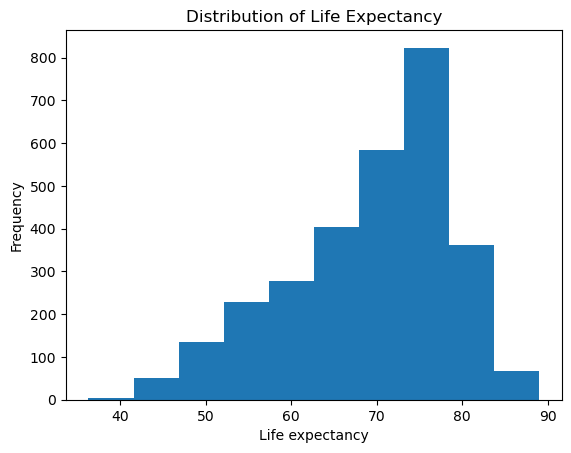

In [14]:
import matplotlib.pyplot as plt

plt.hist(data['Life expectancy '], bins=10)
plt.xlabel('Life expectancy')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy')
plt.show()

The plot shows the distribution of life expectancy values. From the histogram which is skewed to the right, it indicates a higher concentration of countries with higher life expectancy values.

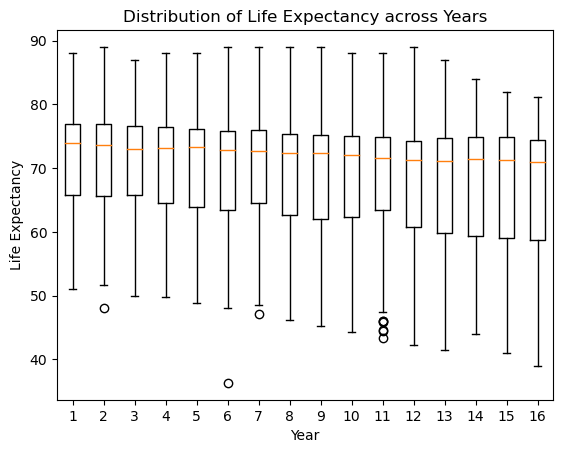

In [15]:
import matplotlib.pyplot as plt

# Group the 'Life expectancy' values by 'Year'
grouped_data = data.groupby('Year')['Life expectancy ']

# Create a list of 'Life expectancy' values for each year
life_expectancy_by_year = [grouped_data.get_group(year) for year in data['Year'].unique()]

# Create the box plot
plt.boxplot(life_expectancy_by_year)
plt.title('Distribution of Life Expectancy across Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

the median line is consistently decreasing, suggesting a negative trend in life expectancy. A longer box indicates greater variability, while a shorter box suggests more consistent life expectancy values.


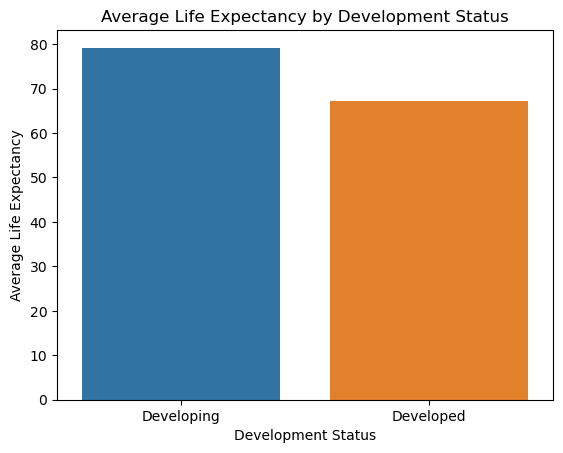

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assign labels to the development status values
status_labels = ['Developing', 'Developed']

# Calculate the average life expectancy for each development status category
average_life_expectancy = data.groupby('Status')['Life expectancy '].mean()

# Create the bar plot using seaborn
sns.barplot(x=status_labels, y=average_life_expectancy)
plt.title('Average Life Expectancy by Development Status')
plt.xlabel('Development Status')
plt.ylabel('Average Life Expectancy')
plt.show()

The developing countries have a higher life expectancy, while developed countries have a slightly lower average life expectancy.

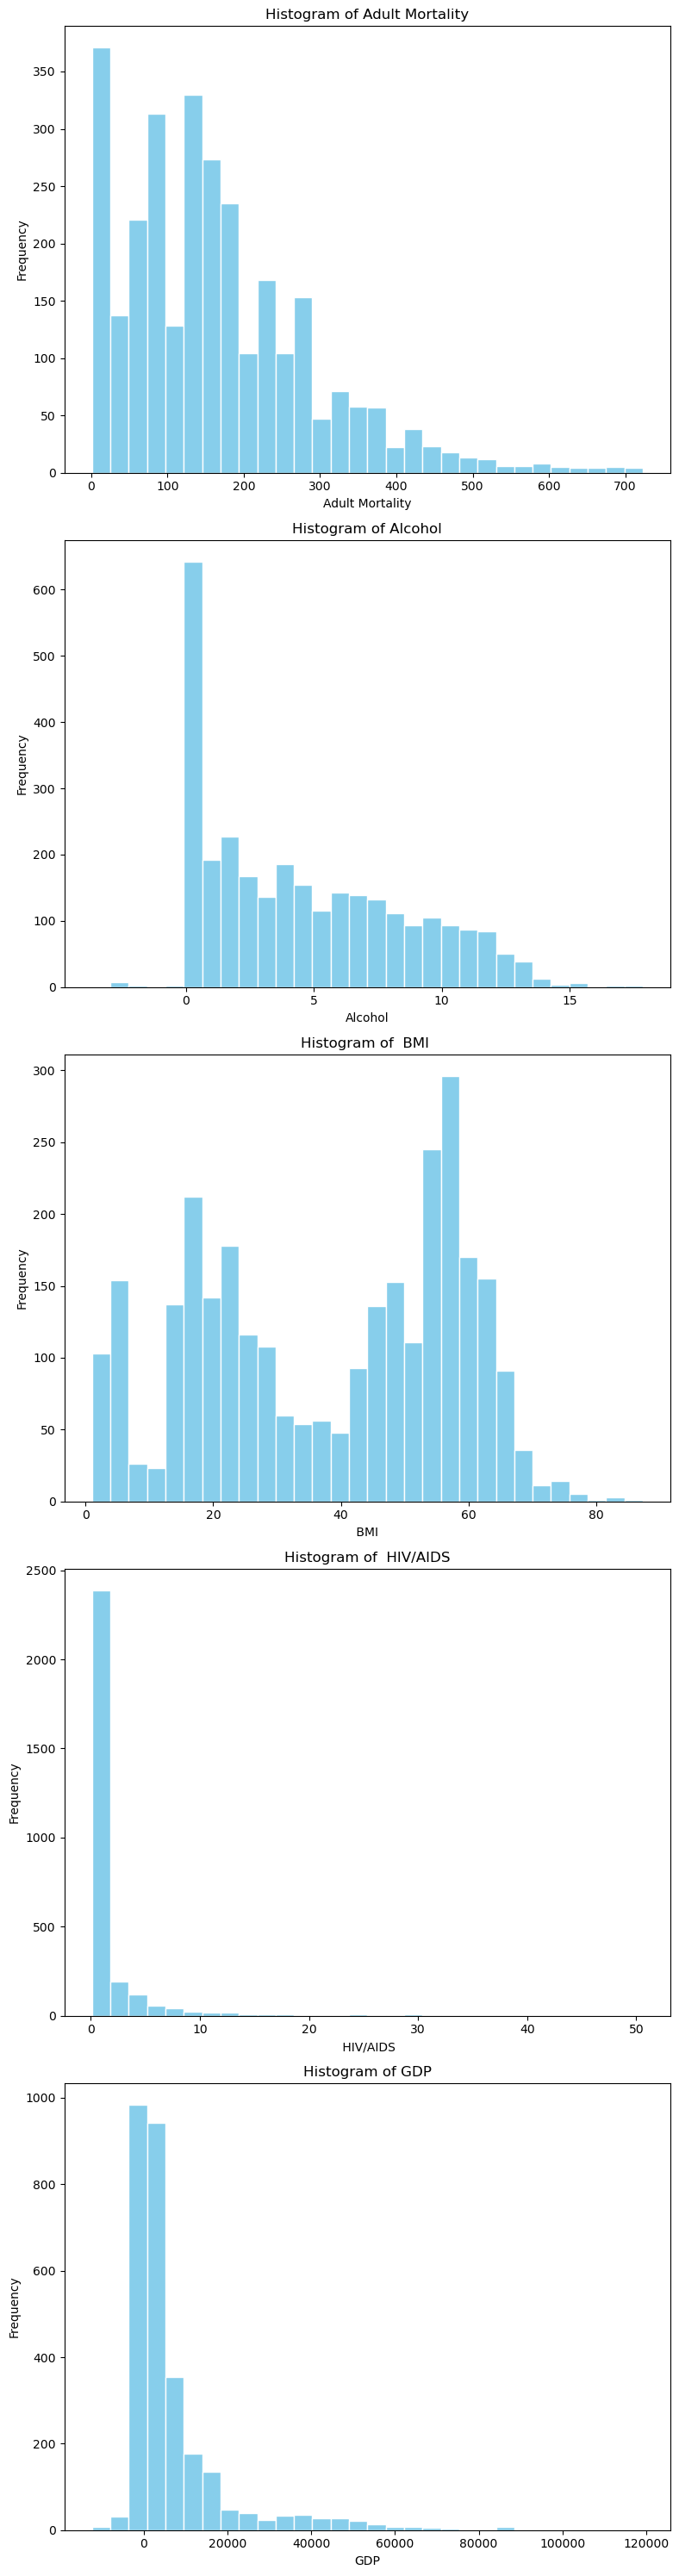

In [17]:
import matplotlib.pyplot as plt

# Select the variables for the histograms
variables = ["Adult Mortality", "Alcohol", " BMI ", " HIV/AIDS", "GDP"]

# Create subplots for each histogram
fig, axs = plt.subplots(len(variables), 1, figsize=(8, 6 * len(variables)))

# Generate histograms for each variable
for i, variable in enumerate(variables):
    axs[i].hist(data[variable], bins=30, color='skyblue', edgecolor='white')
    axs[i].set_title(f'Histogram of {variable}')
    axs[i].set_xlabel(variable)
    axs[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the histograms
plt.show()

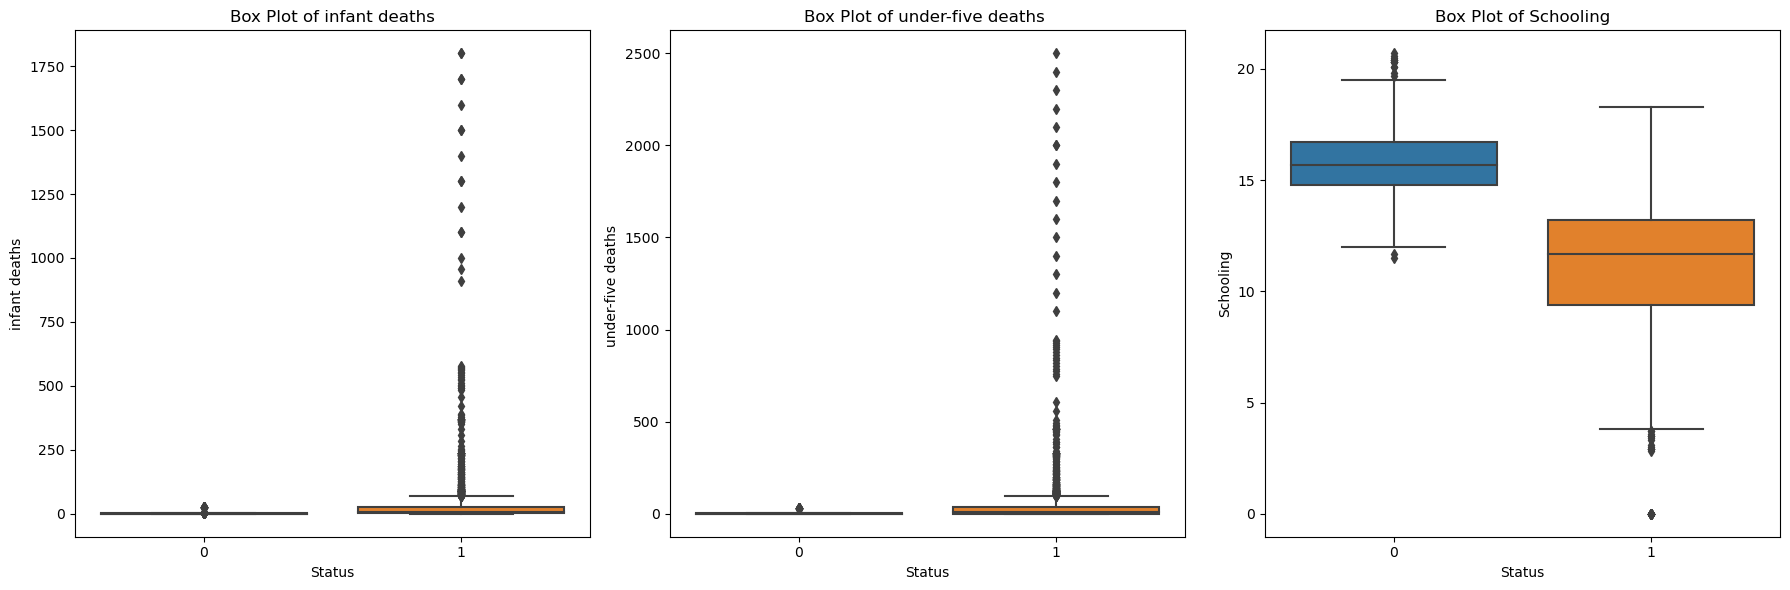

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the variables and grouping variable for the box plots
variables = ['infant deaths', 'under-five deaths ', 'Schooling']
grouping_variable = "Status"  # Replace with the actual column name for grouping by country or development status

# Create box plots for each variable
fig, axs = plt.subplots(1, len(variables), figsize=(6 * len(variables), 6))

for i, variable in enumerate(variables):
    sns.boxplot(x=grouping_variable, y=variable, data=data, ax=axs[i])
    axs[i].set_title(f'Box Plot of {variable}')
    axs[i].set_xlabel(grouping_variable)
    axs[i].set_ylabel(variable)

# Adjust spacing between subplots
plt.tight_layout()

# Display the box plots
plt.show()

In [61]:
data.keys()

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ',
       'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years',
       'Income composition of resources'],
      dtype='object')

0 represents "developed" and 1 represents "developing"

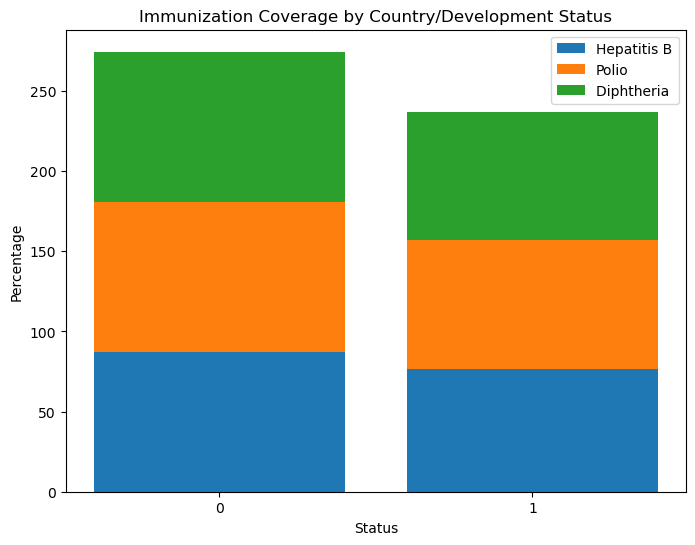

In [19]:
import matplotlib.pyplot as plt
import numpy as np

variables = ['Hepatitis B', 'Polio', 'Diphtheria ']
grouping_variable = "Status"  

percentage_data = data.groupby(grouping_variable)[variables].mean()

fig, ax = plt.subplots(figsize=(8, 6))

x_labels = percentage_data.index
x_pos = np.arange(len(x_labels))

# Plot the stacked bars
bottom = None
for variable in variables:
    ax.bar(x_pos, percentage_data[variable], bottom=bottom, label=variable)
    if bottom is None:
        bottom = percentage_data[variable]
    else:
        bottom += percentage_data[variable]

# Customize the plot
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_xlabel(grouping_variable)
ax.set_ylabel("Percentage")
ax.set_title("Immunization Coverage by Country/Development Status")
ax.legend()

plt.show()

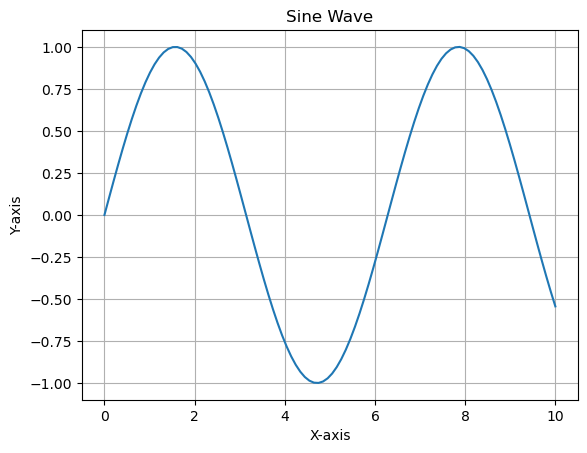

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Sine Wave')
plt.grid(True)
plt.show()

# Correlation Matrix

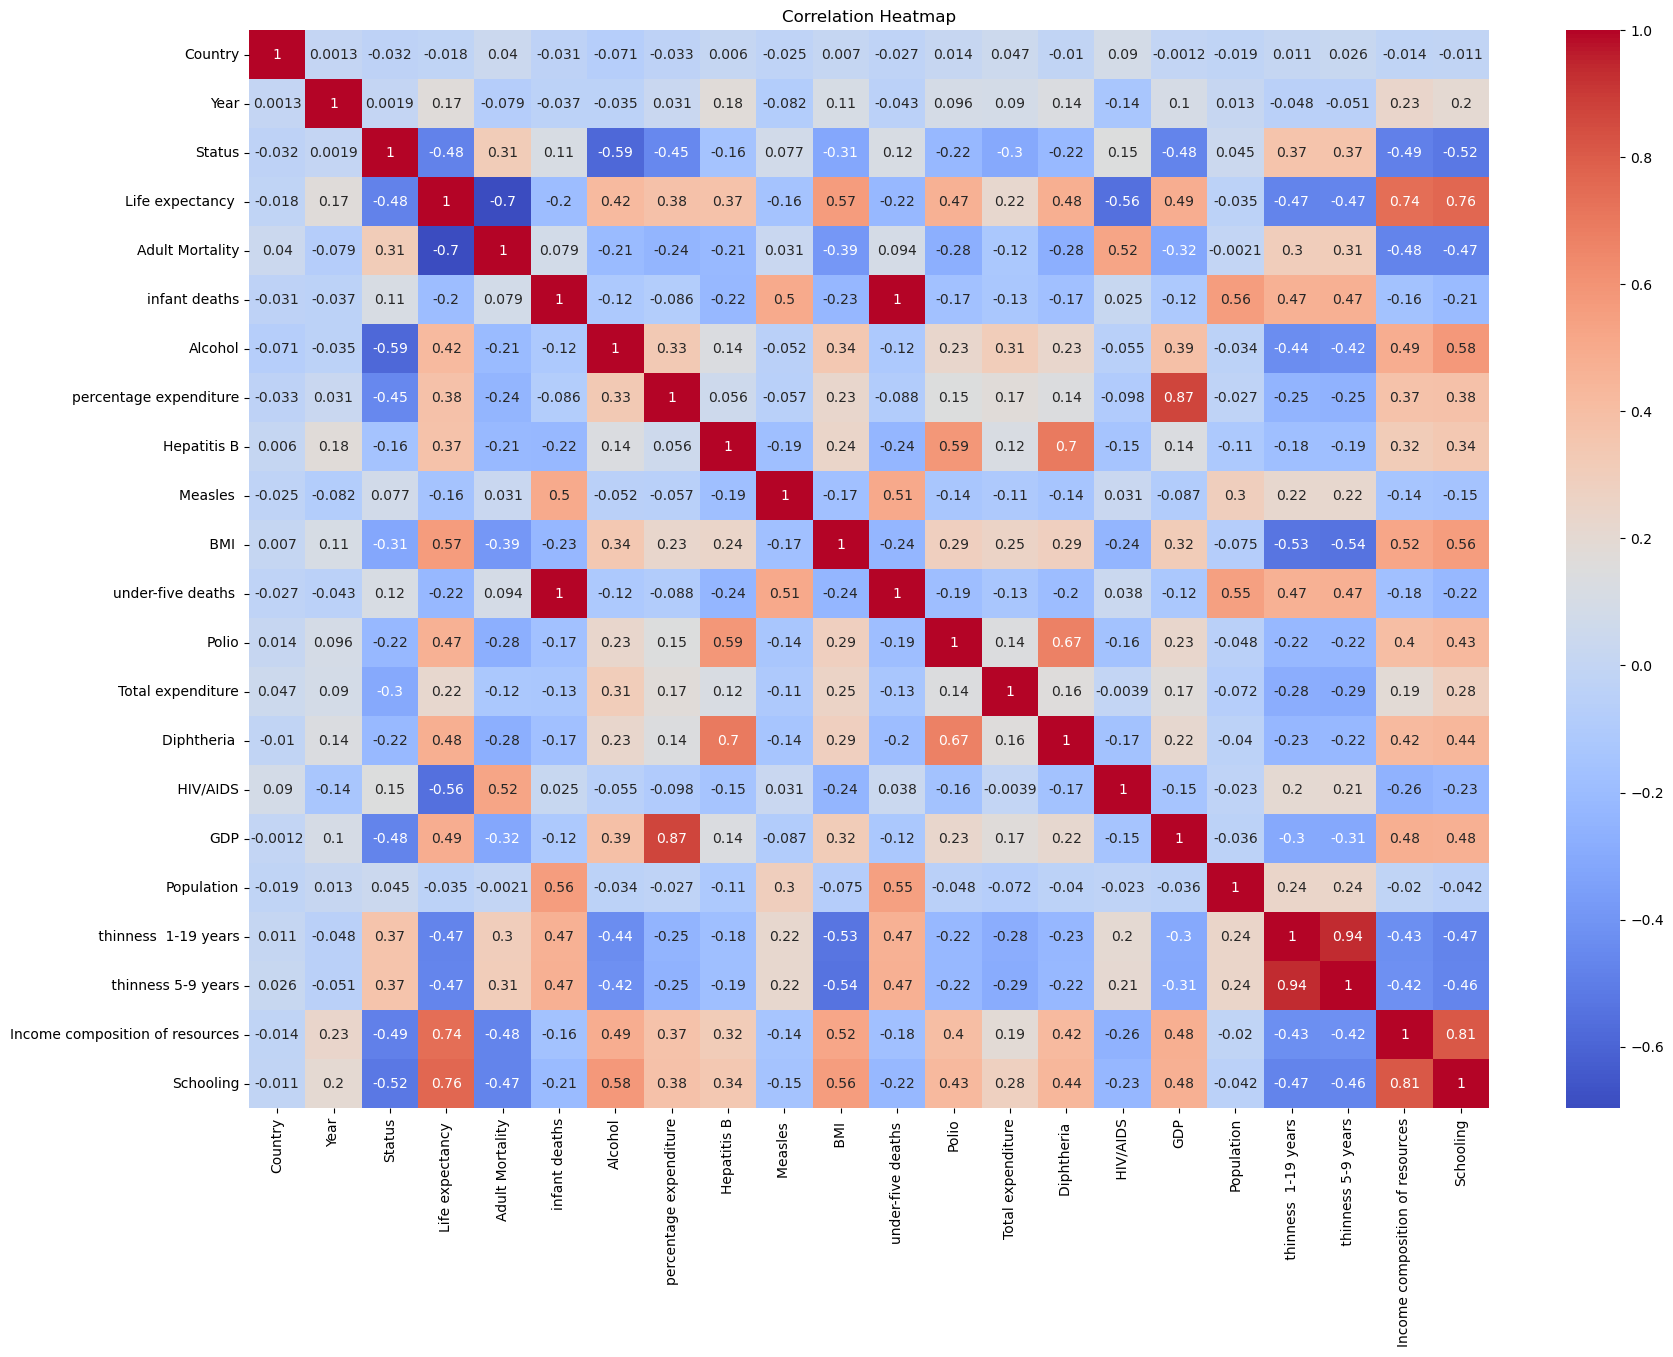

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

# Create the correlation heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Highly correlated variables: Schooling and Income composition of resources, GDP and percentage expenditure, thinness 5-9 years and  thinness  1-19 years & under-five deaths  and infant deaths. So we can drop Schooling, percentage expenditure, thinness 5-9 and infant deaths.

In [22]:
data.keys()

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [23]:
columns_to_drop = ['Schooling', 'percentage expenditure', ' thinness 5-9 years', 'infant deaths']

data.drop(columns_to_drop, axis=1, inplace=True)
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources
0,0,2015,1,65.0,263.0,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479
1,0,2014,1,59.9,271.0,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476
2,0,2013,1,59.9,268.0,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470
3,0,2012,1,59.5,272.0,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463
4,0,2011,1,59.2,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454


Splitting data

In [24]:
X = data.drop('Life expectancy ', axis=1)
y = data['Life expectancy ']

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=23)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2056, 17) (2056,)
Test set: (882, 17) (882,)


# Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

model = LinearRegression()

# Define the hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'fit_intercept': True}
Best Score:  0.8055080207910988


In [28]:
best_model = LinearRegression(**grid_search.best_params_)
best_model.fit(X_train, y_train)

# Make predictions on new data
y_pred = best_model.predict(X_test)

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 17.63423935140206
Mean Absolute Error: 3.128453540815954
R-squared Score: 80.03589603747741
Root Mean Squared Error (RMSE): 4.199314152501818


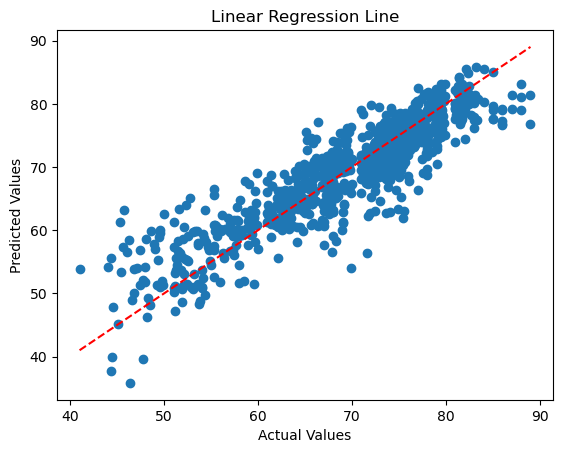

In [30]:
import matplotlib.pyplot as plt

# Plotting the linear regression line
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Line')
plt.show()

By observing the plot, we can see that the majority of the points fall close to the line, indicating a relatively good fit of the linear regression model.

# Lasso

In [45]:
from sklearn.linear_model import Lasso

# Creating the Lasso Regression model
lasso = Lasso(alpha=0.005)

lasso.fit(X_train, y_train)

Lasso(alpha=0.005)

<Axes: title={'center': 'Model Coefficients'}>

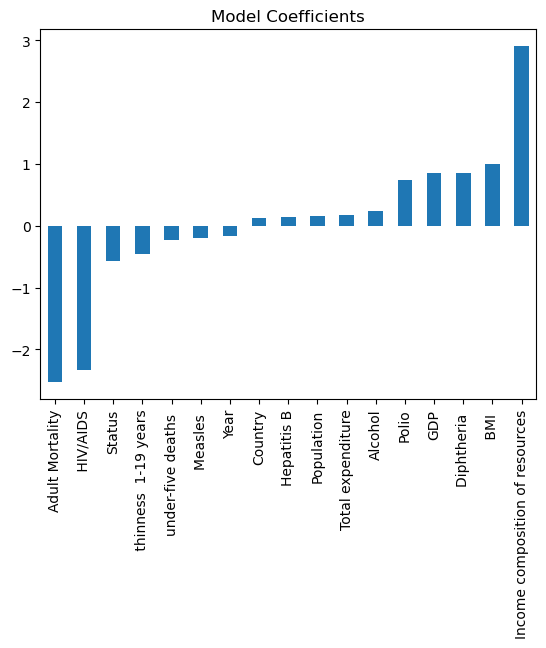

In [46]:
coef = pd.Series(lasso.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

In [ ]:
y_pred = lasso.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 17.635620282631773
Mean Absolute Error: 3.127709553816411
R-squared Score: 80.03433265534984
Root Mean Squared Error (RMSE): 4.19947857270778


# Elastic Net

In [33]:
from sklearn.linear_model import ElasticNet
# Creating the Elastic Net Regression model
elastic_net = ElasticNet(alpha=0.005, l1_ratio=0.005)
elastic_net.fit(X_train, y_train)

y_pred = elastic_net.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 17.644176519888035
Mean Absolute Error: 3.1301857163594984
R-squared Score: 80.02464595400096
Root Mean Squared Error (RMSE): 4.200497175321992


# Ridge Regression

In [44]:
from sklearn.linear_model import Ridge
# Create a Ridge Regression object
ridge = Ridge(alpha=0.005)

ridge.fit(X_train, y_train)

Ridge(alpha=0.005)

<Axes: title={'center': 'Model Coefficients'}>

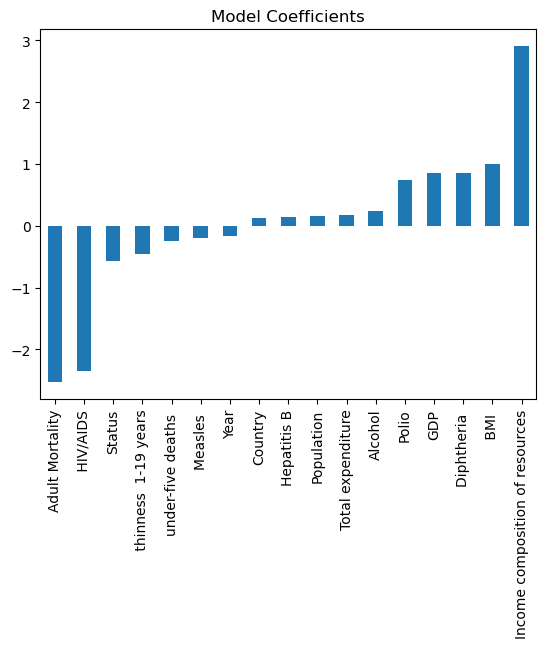

In [41]:
# Get the coefficient values and sort them
coef = pd.Series(model.coef_, X.columns).sort_values()
# Plot the coefficients
coef.plot(kind='bar', title="Model Coefficients")

In [42]:
y_pred = ridge.predict(X_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 17.634244082139794
Mean Absolute Error: 3.128454351475837
R-squared Score: 80.03589068170686
Root Mean Squared Error (RMSE): 4.199314715776825


# Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# RandomForestRegressor with the correct 'criterion' parameter
model = RandomForestRegressor(criterion='squared_error')

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

# Use the best model for prediction
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9603614706467143


In [57]:
importances = best_model.feature_importances_ 
# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the ranked features
print(feature_importances)

                            Feature  Importance
16  Income composition of resources    0.513424
12                         HIV/AIDS    0.309838
3                   Adult Mortality    0.102752
7                              BMI     0.011934
8                under-five deaths     0.010522
15             thinness  1-19 years    0.009033
10                Total expenditure    0.006405
13                              GDP    0.006112
1                              Year    0.005477
4                           Alcohol    0.005470
0                           Country    0.004445
9                             Polio    0.003475
14                       Population    0.003423
11                      Diphtheria     0.002837
5                       Hepatitis B    0.002614
6                          Measles     0.002013
2                            Status    0.000225


In [58]:
# Use the best model for prediction
y_pred = best_model.predict(X_test)

In [59]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 3.6010401803549272
Mean Absolute Error: 1.1840611762037643
R-squared Score: 95.9231844877896
Root Mean Squared Error (RMSE): 1.897640687895084


# Decision trees

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

# Define the hyperparameters to tune
param_grid = {
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
Best Score:  0.923841089029789


In [69]:
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

In [70]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 8.579980419138852
Mean Absolute Error: 1.91244100881557
R-squared Score: 90.28641850262302
Root Mean Squared Error (RMSE): 2.9291603607755676


# Summary

1.Linear Regression : R-squared Score: 80.03
2.Lasso : R-squared Score: 80.03
3.Elastic Net : R-squared Score: 80.02
4.Ridge Regression : R-squared Score: 80.03
5.Random Forest : R-squared Score: 95.90
6.Decision Tree Regression : R-squared Score: 90.29

Random Forest achieves the lowest Mean Squared Error (MSE), implying better accuracy in predictions.
It also has the lowest Mean Absolute Error (MAE), indicating better precision in predicting the target variable.
Random Forest achieves the highest R-squared score, indicating a strong fit to the data and capturing a significant portion of the variance in the target variable.
Random Forest also has the lowest Root Mean Squared Error (RMSE), which represents the standard deviation of the residuals and signifies the model's accuracy in predicting the target variable.

Random Forest outperform the other models.